<a href="https://colab.research.google.com/github/GreggHeller1/Adult-Spine-Models/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

False


In [2]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/Adult-Spine-Models.git

In [3]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/Adult-Spine-Models
    
from src import data_io as io
from src import plotting as plot
from src import computation as comp

In [4]:
#imports
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os


In [5]:
#define paths
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/Adult-Spine-Models/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
print(os.getcwd())
print(os.path.exists(test_path))


soma_path = "/Users/Gregg/code/Adult-Spine-Models/scripts/demo_data/ASC26_cell_3_soma.mat"
spines_path = "/Users/Gregg/code/Adult-Spine-Models/scripts/demo_data/ASC26_cell_3_spines.mat"
print(os.path.exists(soma_path))
print(os.path.exists(spines_path))

demo_data/test.txt
/Users/Gregg/code/adult-spine-models/scripts
True
True
True


In [6]:
#data inputs
#io.readfile(test_path)
soma = io.loadmat(soma_path)
spine_data = io.loadmat(spines_path)


In [7]:
#data manipulation
spines = spine_data
print(soma[3])
print(spines['dend_cell'])

#print(np.shape(soma['soma_cell']))
#print(np.shape(spines['dend_cell']))



#print(soma['soma_cell'][0,3]._fieldnames)


<HDF5 dataset "dend_cell": shape (4, 11), type "|O">


In [36]:
#print(spines.keys())
#print(np.shape(soma[3]))
#print(soma[3].keys())


soma_field_2 = io._todict(soma[2])

ref = spines['dend_cell'][2,0]
spine_field_2 = spines[ref]#['DSI']

#print(np.array(field_2))
#print(field_2['vis_stim_times'])

#spines_f2 = 


In [37]:
print(spine_field_2['trial_traces'].shape)

(91, 10, 1, 16, 14)


In [40]:
soma_traces = np.array(soma_field_2['trial_traces'])
spine_traces = np.array(spine_field_2['trial_traces'][:,:,0,:,0].swapaxes(0,-1))

print(soma_traces.shape)
print(spine_traces.shape)


#trial_amps = np.array(field_2['trial_amp'])
#print(trial_amps.shape)

(16, 10, 91)
(16, 10, 91)


In [17]:
soma_sub_traces = comp.select_timesteps(soma_traces)
soma_means, soma_means_sorted, soma_bool = plot.produce_activity_plots(soma_sub_traces)

here
here
(16, 10, 20)


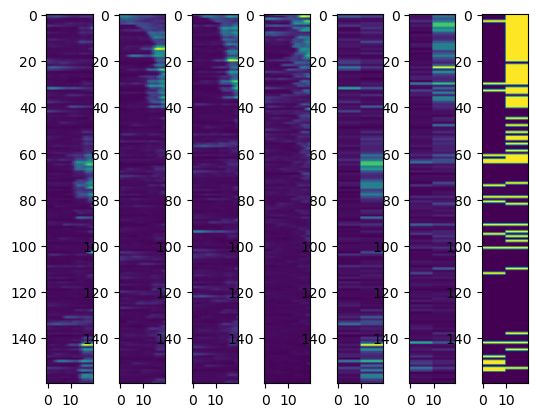

In [31]:
plot.plot_activity_plots(soma_sub_traces, soma_means, soma_means_sorted, soma_bool)

In [32]:
summed_spine_traces = comp.get_summed_spine_trace(spine_data)
spine_sub_traces = comp.select_timesteps(summed_spine_traces)
spine_means, spine_means_sorted, spine_bool = plot.produce_activity_plots(spine_sub_traces)    

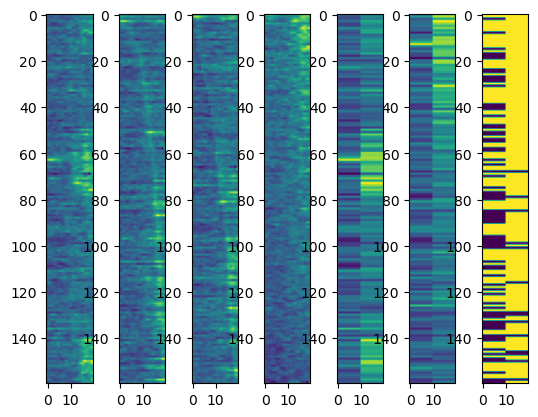

In [33]:
plot.plot_activity_plots(spine_sub_traces, spine_means, spine_means_sorted, spine_bool)

In [42]:
spine_sub_traces = comp.select_timesteps(spine_traces)
spine_means, spine_means_sorted, spine_bool = plot.produce_activity_plots(spine_sub_traces)  

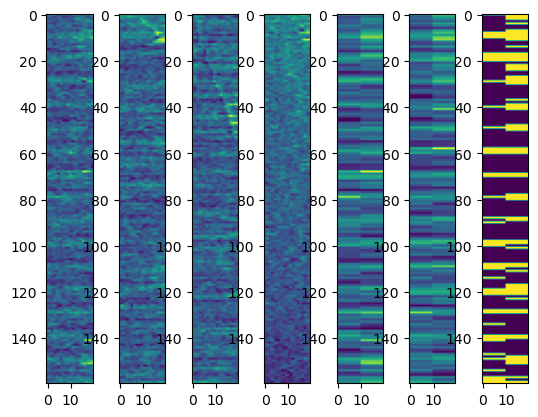

In [43]:
plot.plot_activity_plots(spine_sub_traces, spine_means, spine_means_sorted, spine_bool)

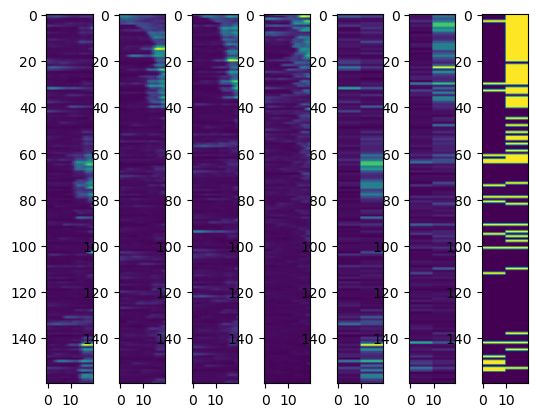

In [45]:
plot.plot_activity_plots(soma_sub_traces, soma_means, soma_means_sorted, soma_bool)

In [46]:
best_match_traces, best_match_FOV, best_match_idx, max_dot = comp.get_most_similar_spine(soma_sub_traces, spine_data)
spine_means, spine_means_sorted, spine_bool = plot.produce_activity_plots(best_match_traces)  

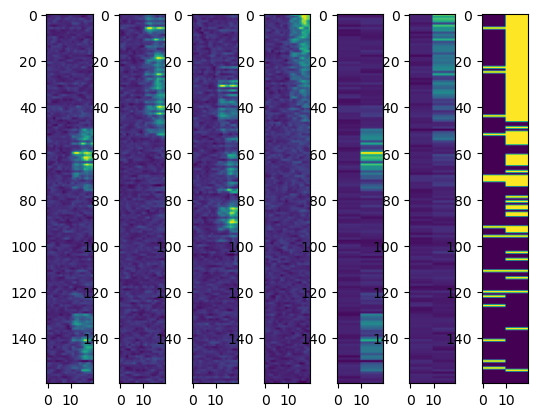

In [47]:
plot.plot_activity_plots(best_match_traces, spine_means, spine_means_sorted, spine_bool)